In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
submission = pd.read_csv("C:/Users/s_liouxe/Desktop/study/ML/블루베리/sample_submission.csv")
train = pd.read_csv("C:/Users/s_liouxe/Desktop/study/ML/블루베리/train.csv")
test = pd.read_csv("C:/Users/s_liouxe/Desktop/study/ML/블루베리/test.csv")

In [176]:
submission

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194
4,15293,6025.194
...,...,...
10189,25478,6025.194
10190,25479,6025.194
10191,25480,6025.194
10192,25481,6025.194


In [202]:
print(f"train shape :{train.shape}")
print(f"test shape :{test.shape}")

train shape :(15289, 18)
test shape :(10194, 17)


### 1. EDA

null 값 체크 - train, test 모두 null 값 존재 X

In [178]:
train.isnull().sum()
test.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

상관관계 분석

<AxesSubplot:>

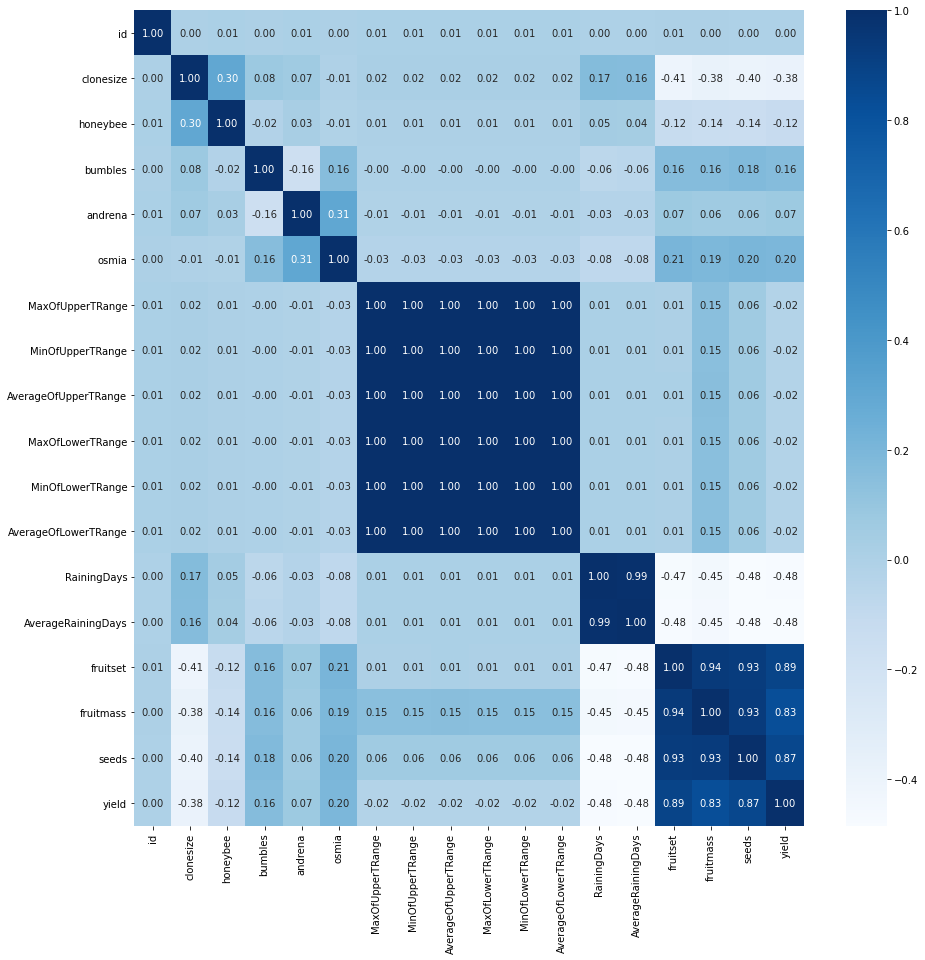

In [179]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', cmap='Blues')

* Range 붙은 변수는 서로 상관관계가 높음. 얘네 중 하나만 사용해도 될 것 같음.
* fruitset과 fruitmass의 경우 yield와 상관관계가 높은 fruit만 사용.
* RainingDays와 AverageRainingDays도 변수 하나만 사용. 여기서는 RainingDays를 사용할 예정.

#### 변수 빼는 작업
train과 test를 병합 후에 한 번에 변수 제거 후 다시 train과 test로 쪼갬

In [180]:
df = pd.concat([train, test])
print(len(train), len(test))
df.reset_index()

15289 10194


,index,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,10189,25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,10190,25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,10191,25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,NaN
25481,10192,25481,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847,NaN


In [181]:
train.loc[[15288]]

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
15288,15288,25.0,0.5,0.25,0.63,0.5,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.492077,0.446576,35.094733,5867.99722


In [182]:
df.columns.to_list()

['id',
 'clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds',
 'yield']

In [183]:
# 삭제할 변수

df = df.drop(['id', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset'], axis = 1)
df

,clonesize,honeybee,bumbles,andrena,osmia,RainingDays,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,24.0,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,24.0,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,24.0,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,24.0,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,24.0,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...
10189,25.0,0.25,0.25,0.25,0.25,24.0,0.437923,34.525258,NaN
10190,25.0,0.50,0.25,0.50,0.75,16.0,0.440676,35.648221,NaN
10191,25.0,0.50,0.38,0.50,0.50,16.0,0.463065,37.724724,NaN
10192,12.5,0.25,0.25,0.38,0.50,34.0,0.409261,31.881847,NaN


In [ ]:
# 20230526 범주화 추가


In [184]:
train1 = df.iloc[:15289]
test1 = df.iloc[15289:]

In [185]:
from sklearn.model_selection import train_test_split
train1_ = train1.drop(['yield'], axis = 1)
train1_y = train1['yield']
X_train, X_test, y_train, y_test = train_test_split(train1_, train1_y, test_size=0.3, random_state=42)

In [186]:
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))


X_train 10702
X_test 4587
y_train 10702
y_test 4587


#### 1. 랜덤 포레스트

In [187]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, min_samples_split=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

result = pd.DataFrame({'pred':y_pred, 'real' : y_test})

result

,pred,real
3519,7773.273076,8711.20896
6096,5673.133693,5914.16491
895,4427.864694,4234.86859
11345,5861.290880,5504.75083
7219,3432.228922,3276.36206
...,...,...
11114,7678.229805,7127.16457
852,5498.092019,5912.43376
1494,4911.531281,4924.35736
8624,6590.123854,6589.27898


In [188]:
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mae", mae)
print("mse :", mse)
print("rmse :", rmse)


mae 427.37565731564746
mse : 432948.4059321409
rmse : 657.9881502976638


In [189]:
test_ = test1.drop(['yield'], axis = 1)
y_submission = model.predict(test_)

In [190]:
y_submission = pd.DataFrame(y_submission)
y_submission = y_submission.rename(columns={0 : 'yield'})
y_submission

,yield
0,4340.655487
1,6758.191110
2,6984.886119
3,5110.190957
4,3777.727238
...,...
10189,5687.684589
10190,5882.398196
10191,6597.251953
10192,4460.903582


In [191]:
sub = pd.concat([test, y_submission], axis=1)
sub

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569,4340.655487
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956,6758.191110
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644,6984.886119
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091,5110.190957
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019,3777.727238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,5687.684589
10190,25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,5882.398196
10191,25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,6597.251953
10192,25481,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847,4460.903582


In [192]:
sub_test = sub[['id', 'yield']]
sub_test.to_csv('submission.csv', index=False)

#### 1-1 랜덤 포레스트 결과 : 
408.1

In [193]:
submission

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194
4,15293,6025.194
...,...,...
10189,25478,6025.194
10190,25479,6025.194
10191,25480,6025.194
10192,25481,6025.194


#### 2. XGBOOST

In [194]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(random_state=42)
xg_model.fit(X_train, y_train)

pred2 = xg_model.predict(X_test)

mae = mean_absolute_error(pred2, y_test)
print("MAE :", mae)

MAE : 429.511203902784


In [195]:
testing = [10, 100, 200, 500, 1000]
lr = [0.5, 0.1, 0.05, 0.01]

for t in testing:
    for i in lr:
        xgb_model3 = XGBRegressor(n_estimators=t, learning_rate=i, max_depth=5)
        xgb_model3.fit(X_train, y_train)
        pred3 = xgb_model3.predict(X_test)
        mae_3 = mean_absolute_error(pred3, y_test)

        print(f"estimator = {t}, learning rate = {i}, MAE =", mae_3)

estimator = 10, learning rate = 0.5, MAE = 417.1351966532371
estimator = 10, learning rate = 0.1, MAE = 2118.713721124995
estimator = 10, learning rate = 0.05, MAE = 3614.878037022385
estimator = 10, learning rate = 0.01, MAE = 5453.197893459887
estimator = 100, learning rate = 0.5, MAE = 435.462980522494
estimator = 100, learning rate = 0.1, MAE = 415.22005333226036
estimator = 100, learning rate = 0.05, MAE = 416.36182169778385
estimator = 100, learning rate = 0.01, MAE = 2222.250781593787
estimator = 200, learning rate = 0.5, MAE = 453.9712356279209
estimator = 200, learning rate = 0.1, MAE = 416.8579462414841
estimator = 200, learning rate = 0.05, MAE = 414.8872941809904
estimator = 200, learning rate = 0.01, MAE = 884.7089278227872
estimator = 500, learning rate = 0.5, MAE = 482.5396403586648
estimator = 500, learning rate = 0.1, MAE = 424.6283811259231
estimator = 500, learning rate = 0.05, MAE = 416.5621139143061
estimator = 500, learning rate = 0.01, MAE = 416.7434162402919
est

In [200]:
xgb_final = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5)
xgb_final.fit(X_train, y_train)
pred_xgb = xgb_final.predict(test_)

len(pred_xgb)

10194

In [197]:
len(X_train)

10702

In [198]:
output = pd.DataFrame({'id': test.id,
                       'yield': pred_xgb})
output.to_csv('submission.csv', index=False)
output

,id,yield
0,15289,4345.858398
1,15290,6751.552734
2,15291,7181.213867
3,15292,4795.256836
4,15293,3732.843506
...,...,...
10189,25478,5467.224609
10190,25479,5811.626465
10191,25480,6514.587891
10192,25481,4712.779297


In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randomforest_model = RandomForestRegressor()

rf_params = {'random_state':[42], 'n_estimators':[100, 120, 500]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              parm_grid=rf_params,
                                              cv=5)

gridesearch_random_forest_model.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'parm_grid'